# US Housing Market Analysis

In [72]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from [US Housing Market Analysis: Supply-Demand Dynamics](https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us) on Kaggle. There are 2 csv files in this dataset: `supply.csv' and `demand.csv`. 

In [73]:
# Read in data
file_path = Path("data/supply.csv")
supply_df = pd.read_csv(file_path)
supply_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895


In [74]:
# Read in data
file_path = Path("data/demand.csv")
demand_df = pd.read_csv(file_path)
demand_df.head()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [75]:
# combine data
combined_df = pd.merge(supply_df, demand_df, on="DATE")
combined_df.head()

,DATE,CSUSHPISA_x,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_y,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [76]:
# rename CSUSHPISA_x to CSUSHPISA and drop CSUSHPISA_y
combined_df = combined_df.rename(columns={"CSUSHPISA_x": "CSUSHPISA"})
combined_df = combined_df.drop(columns=["CSUSHPISA_y"])
combined_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [77]:
# fill NaN values for INTDSRUSM193N with value from previous row
combined_df["INTDSRUSM193N"] = combined_df["INTDSRUSM193N"].fillna(method="ffill")


In [78]:
combined_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
76,01-01-2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,0.25,433100,24740.480
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,0.25,449300,25248.476
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,0.25,468000,25723.941
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,0.25,479500,26137.992
80,01-01-2023,.,8.033333333,1424.333333,842559.6667,15053,6.372308,64.633333,0.25,436800,26465.865


In [79]:
# replace the value of the last row of the 'CSUSHPISA' column with 294.30366667
combined_df.loc[combined_df.index[-1], "CSUSHPISA"] = "294.30366667"
combined_df.tail()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
76,01-01-2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,0.25,433100,24740.480
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,0.25,449300,25248.476
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,0.25,468000,25723.941
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,0.25,479500,26137.992
80,01-01-2023,294.30366667,8.033333333,1424.333333,842559.6667,15053,6.372308,64.633333,0.25,436800,26465.865


In [130]:
# create a new column called 'PRICE_CHANGE_UP_DOWN' and set the values to 0 if the value of the 'CSUSHPISA' column is less than the value of the previous row, otherwise set the value to 1
combined_df["PRICE_CHANGE_UP_DOWN"] = np.where(combined_df["CSUSHPISA"] < combined_df["CSUSHPISA"].shift(1), 0, 1)
combined_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,CSUSHPISA_NEXT_Q,PRICE_CHANGE_UP_DOWN
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129,131.756,1
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766,135.013,1
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669,138.8356667,1
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234,143.2986667,1
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447,148.209,1


In [103]:
# create a new column for CSUSHPISA that is the value from the next row
combined_df["CSUSHPISA_NEXT_Q"] = combined_df["CSUSHPISA"].shift(-1)

In [106]:
# get the value counts for the PRICE_CHANGE_UP_DOWN column
combined_df["PRICE_CHANGE_UP_DOWN"].value_counts()

1    58
0    23
Name: PRICE_CHANGE_UP_DOWN, dtype: int64

# Defining the feature and target variables

In [107]:
# Define features set
X = combined_df.copy()
X = X.drop("DATE", axis=1)
X = X.drop("CSUSHPISA", axis=1)
X = X.drop("CSUSHPISA_NEXT_Q", axis=1)
X = X.drop("PRICE_CHANGE_UP_DOWN", axis=1)
# drop first row
X = X.iloc[1:]
X.head()

,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
1,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447
5,3.9,2080,526483.3333,16079,6.106154,93.333333,2.083333,217600,12112.815


In [108]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(80, 9)
MSACSR            0
PERMIT            0
TLRESCONS         0
EVACANTUSQ176N    0
MORTGAGE30US      0
UMCSENT           0
INTDSRUSM193N     0
MSPUS             0
GDP               0
dtype: int64


# Creating the target vector CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [109]:
# Define target vector 'PRICE_CHANGE_UP_DOWN' as y
y = combined_df["PRICE_CHANGE_UP_DOWN"].values.reshape(-1, 1)
y = y[1:]
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

# Splitting the data into training and testing sets

In [110]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [111]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [112]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [129]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled.shape

(20, 9)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [114]:
# create the random forrest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [127]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [116]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [1 1 1 0 0 1 1 1 1 1]
First 10 Actual labels: [[1], [1], [1], [1], [0], [1], [1], [1], [1], [1]]


# Evaluating the Random Forest model

In [117]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()})
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
# find the highest percent difference
results_df["Percent Difference"].max()
results_df.head(10)

,Prediction,Actual,Difference,Percent Difference
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,100.0
4,0.0,0.0,0.0,NaN
5,1.0,1.0,0.0,0.0
6,1.0,1.0,0.0,0.0
7,1.0,1.0,0.0,0.0
8,1.0,1.0,0.0,0.0
9,1.0,1.0,0.0,0.0


In [118]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.1


In [119]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1


In [120]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.31622776601683794


In [121]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: 11.764705882352942


In [123]:
# Evaluating the Random Forest model
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.9


# Feature importance

In [124]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

MSACSR: (0.25664006790211197)
PERMIT: (0.11164066591076488)
TLRESCONS: (0.07325751261982695)
EVACANTUSQ176N: (0.11803463009754364)
MORTGAGE30US: (0.06817880933848895)
UMCSENT: (0.1965653540613848)
INTDSRUSM193N: (0.01785101593239683)
MSPUS: (0.10289310777007477)
GDP: (0.05493883636740716)


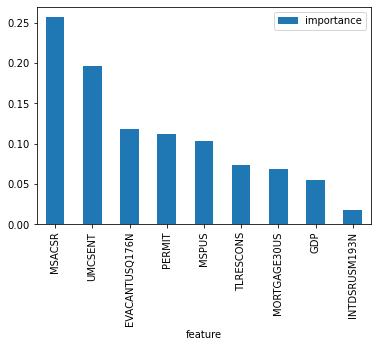

In [132]:
# add the feature importance to a dataframe
feature_importance_df = pd.DataFrame({"feature": feature_list, "importance": importances})
# sort the dataframe by the importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)
# set the index to be the feature
feature_importance_df = feature_importance_df.set_index("feature", drop=True)
# plot the feature importance
feature_importance_df.plot(kind="bar")
# save the graph
plt.savefig("images/feature_importance2.png", size=(20, 10))
plt.show()

In [131]:

# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
# create a dataframe from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# display the confusion matrix
display(cm_df)

# output the confusion matrix as a table



,Predicted 0,Predicted 1
Actual 0,3,0
Actual 1,2,15


<Figure size 432x288 with 0 Axes>